In [2]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 23.0 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


## Importing necessary libraries

In [1]:
from faker import Faker
import numpy as np
import pandas as pd
from random import choice, sample
import matplotlib.pyplot as plt
import seaborn as sns

## Data Generation
1. Generating Random Names: Using the Faker library, we generate 350,000 random names.
2. Generating Random Races: We assign a race to each individual based on specified probabilities.

In [2]:
# Initialize Faker instance
df = Faker()

# Function to generate random names
def generateNames():
   names = []
   for i in range(0, 350000):
        names.append(df.name())
   return names

In [3]:
# Generate 350,000 random names
names = generateNames()

In [4]:
# Create a DataFrame with generated names
df_name = pd.DataFrame(list(zip(names)),columns = ['Name'])

In [5]:
df_name.head()

,Name
0,Samantha Garner
1,Derrick Gomez
2,Veronica Baker
3,Mrs. Amber Powell
4,Diane Holland


In [6]:
# Function to generate random races based on given probabilities
def generateRace(*iterables):
    return [
        np.random.choice(population, p=np.array(weights) / sum(weights))
        for population, weights in iterables
    ]

# Define races and their probabilities
races = (['White', 'Hispanic', 'Black', 'Asian'], [.32, .28, .22, .18])

# Generate race data for 350,000 individuals
race_data = [generateRace(races) for _ in range(350000)]

In [7]:
df_race=pd.DataFrame(race_data, columns = ['Race'])

In [8]:
df_race.head()

,Race
0,Hispanic
1,Black
2,Asian
3,Hispanic
4,Black


## Data Preparation
3. Combining Data: We combine the generated names and races with drug review data from a CSV file.
4. Saving Data: The combined data is saved into a new CSV file for further processing.

In [9]:
# Combine name and race data into a single DataFrame
df_nr = pd.concat([df_name, df_race], axis=1).reindex(df_race.index)

In [10]:
# Read drug review data
df_drugs = pd.read_csv('webmd.csv')

In [11]:
# Combine name-race data with drug review data
data_drugs = pd.concat([df_nr, df_drugs], axis=1).reindex(df_drugs.index)

In [12]:
data_drugs.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Samantha Garner,Hispanic,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Derrick Gomez,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Veronica Baker,Asian,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Mrs. Amber Powell,Hispanic,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Diane Holland,Black,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


In [13]:
# Save combined data to a CSV file
data_drugs = data_drugs.to_csv('dataset_drugs.csv', index=False)

In [2]:
# Read the saved CSV file
data = pd.read_csv('dataset_drugs.csv')

In [3]:
data.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
0,Samantha Garner,Hispanic,75 or over,Stuffy Nose,9/21/2014,25dph-7.5peh,146724,5,5,I'm a retired physician and of all the meds I ...,5,Male,"Drowsiness, dizziness , dry mouth /nose/thro...",0
1,Derrick Gomez,Black,25-34,Cold Symptoms,1/13/2011,25dph-7.5peh,146724,5,5,cleared me right up even with my throat hurtin...,5,Female,"Drowsiness, dizziness , dry mouth /nose/thro...",1
2,Veronica Baker,Asian,65-74,Other,7/16/2012,warfarin (bulk) 100 % powder,144731,2,3,why did my PTINR go from a normal of 2.5 to ov...,3,Female,,0
3,Mrs. Amber Powell,Hispanic,75 or over,Other,9/23/2010,warfarin (bulk) 100 % powder,144731,2,2,FALLING AND DON'T REALISE IT,1,Female,,0
4,Diane Holland,Black,35-44,Other,1/6/2009,warfarin (bulk) 100 % powder,144731,1,1,My grandfather was prescribed this medication ...,1,Male,,1


## Data Cleaning
5. Handling Missing Values: We identify and handle missing values by removing rows with null values.
6. Text Cleaning: We clean the Sides column, which contains side effects descriptions, by removing non-alphabetic characters and stopwords.

In [4]:
# Check for any null values
data.isnull().any()

Name              True
Race              True
Age              False
Condition        False
Date             False
Drug             False
DrugId           False
EaseofUse        False
Effectiveness    False
Reviews           True
Satisfaction     False
Sex              False
Sides            False
UsefulCount      False
dtype: bool

In [5]:
data.isna().sum()

Name             12805
Race             12805
Age                  0
Condition            0
Date                 0
Drug                 0
DrugId               0
EaseofUse            0
Effectiveness        0
Reviews             43
Satisfaction         0
Sex                  0
Sides                0
UsefulCount          0
dtype: int64

In [6]:
data['Sides'].value_counts()

Sides
                                                                                                                                                       17460
Nausea ,  vomiting ,  constipation ,  lightheadedness ,  dizziness , or drowsiness may occur.                                                          15563
Nausea ,  vomiting ,  headache ,  bloating ,  breast  tenderness, swelling of the  ankles /feet (fluid retention), or  weight  change may occur.       12116
Dizziness ,  lightheadedness , tiredness, or  headache  may occur as your body adjusts to the  medication . Dry  cough  may also occur.                 9161
Drowsiness,  dizziness , loss of coordination, tiredness, blurred/ double vision , unusual  eye  movements, or shaking (tremor) may occur.              7790
                                                                                                                                                       ...  
Nausea ,  vomiting ,  stomach / abdominal pain , gas

In [7]:
data['Drug'].value_counts().head(10)

Drug
cymbalta                     4648
lisinopril solution          4269
lisinopril                   4268
lexapro                      4134
hydrocodone-acetaminophen    3944
effexor xr                   3486
lyrica                       3069
tramadol hcl er              2932
tramadol hcl                 2932
zoloft                       2662
Name: count, dtype: int64

In [8]:
drug_topamax= data.loc[(data['Drug'] =='topamax')]
drug_topamax.head(5)

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount
191567,Devin Jenkins,White,45-54,Migraine Prevention,9/22/2019,topamax,14494,4,4,"I was on this drug for 5 years, 100mg for the ...",1,,"Tiredness, drowsiness, dizziness , loss of co...",5
191574,Sylvia Miller,Hispanic,35-44,Simple Partial Seizures,9/2/2019,topamax,14494,4,4,I have partial seizures. It didn't help for a ...,4,,"Tiredness, drowsiness, dizziness , loss of co...",0
191581,Leslie Castillo,White,13-18,Migraine Prevention,8/9/2019,topamax,14494,1,1,I have been having migraines and headaches eve...,1,,"Tiredness, drowsiness, dizziness , loss of co...",6
191588,David Anderson,Black,65-74,Essential Tremor,7/21/2019,topamax,14494,4,4,This is the only medication I have taken for t...,3,,"Tiredness, drowsiness, dizziness , loss of co...",0
191595,Jacob Boyd,Black,45-54,Migraine Prevention,4/30/2019,topamax,14494,5,5,I suffered from debilitating Cluster Headaches...,5,,"Tiredness, drowsiness, dizziness , loss of co...",2


In [9]:
data_new = drug_topamax.copy()

In [10]:
# Handling instances with whitespaces
for i in data_new:
    data_new[i]=np.where(data_new[i]==" ",np.NAN,data_new[i])

In [11]:
#checking missing values
data_new.isnull().sum()

Name               0
Race               0
Age               75
Condition          0
Date               0
Drug               0
DrugId             0
EaseofUse          0
Effectiveness      0
Reviews          200
Satisfaction       0
Sex              103
Sides              0
UsefulCount        0
dtype: int64

In [12]:
# Removing rows with null data
data_new=data_new.dropna(axis=0)

In [13]:
data_new.isnull().sum()

Name             0
Race             0
Age              0
Condition        0
Date             0
Drug             0
DrugId           0
EaseofUse        0
Effectiveness    0
Reviews          0
Satisfaction     0
Sex              0
Sides            0
UsefulCount      0
dtype: int64

In [14]:
# converting rows having data other than string datatype into string.
for i in range(0,len(data_new)-1):
    if type(data_new.iloc[i]['Sides']) != str:
        data_new.iloc[i]['Sides'] = str(data_new.iloc[i]['Sides'])

In [15]:
# Function to clean text data
import re
def cleaning_text(i):
    i = re.sub("[^A-Za-z" "]+"," ",i).lower()
    i = re.sub("[0-9" "]+"," ",i)
    i= re.sub("[\W+""]", " ",i)        
    w = []
    for word in i.split(" "):
        if len(word)>3:
            w.append(word)
    return (" ".join(w))

In [16]:
# Clean the 'Sides' column
data_new.Sides= data_new.Sides.apply(cleaning_text)
data_new.Sides

191609    tiredness drowsiness dizziness loss coordinati...
191623    tiredness drowsiness dizziness loss coordinati...
191630    tiredness drowsiness dizziness loss coordinati...
191637    tiredness drowsiness dizziness loss coordinati...
191644    tiredness drowsiness dizziness loss coordinati...
                                ...                        
197199    tiredness drowsiness dizziness loss coordinati...
197200    tiredness drowsiness dizziness loss coordinati...
197201    tiredness drowsiness dizziness loss coordinati...
197202    tiredness drowsiness dizziness loss coordinati...
197203    tiredness drowsiness dizziness loss coordinati...
Name: Sides, Length: 1830, dtype: object

In [17]:
# Remove stopwords from the 'Sides' column
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
data_new['Sides'] = data_new['Sides'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/samvarankohli/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
# Analyzing age distribution and cleaning age data
data_new['Age'].value_counts()

Age
45-54         463
35-44         455
25-34         423
55-64         196
19-24         184
13-18          51
65-74          37
7-12            8
75 or over      8
3-6             3
0-2             2
Name: count, dtype: int64

In [19]:
data_new['Age']=data_new['Age'].str.replace('75 or over','75-100')

In [20]:
# Drop rows with invalid satisfaction scores
data_new.drop(labels = data_new[data_new['Satisfaction'] == 6].index, axis = 0, inplace = True)

In [21]:
# Recode satisfaction levels to categorical values
data1=np.where(data_new['Satisfaction'] == 1.0, "Nil", data_new['Satisfaction'])
data1=np.where(data_new['Satisfaction'] == 2.0, "Mild",data1)
data1=np.where(data_new['Satisfaction'] == 3.0, "Moderate", data1)
data1=np.where(data_new['Satisfaction'] == 4.0, "Severe", data1)
data1=np.where(data_new['Satisfaction'] == 5.0, "Extreme",data1)

In [22]:
data_new['SideEffects']=data1

In [23]:
data_new.head()

,Name,Race,Age,Condition,Date,Drug,DrugId,EaseofUse,Effectiveness,Reviews,Satisfaction,Sex,Sides,UsefulCount,SideEffects
191609,Brian Barber,White,7-12,Simple Partial Seizures,2/26/2019,topamax,14494.0,4.0,5.0,"I'm now 30 years old, but I was 12 when I was ...",5.0,Male,tiredness drowsiness dizziness loss coordinati...,0.0,Extreme
191623,Seth Gomez,Asian,25-34,Other,1/1/2019,topamax,14494.0,1.0,1.0,I was put on 50mg a day of topamax for chronic...,1.0,Female,tiredness drowsiness dizziness loss coordinati...,0.0,Nil
191630,Janet Bell,Asian,45-54,Other,6/22/2014,topamax,14494.0,2.0,2.0,I'm taking Gabapentin for Central Neuropathy!!...,2.0,Female,tiredness drowsiness dizziness loss coordinati...,0.0,Mild
191637,Cameron Young,White,65-74,Migraine Prevention,6/22/2014,topamax,14494.0,5.0,5.0,I have been taking Topamax for exactly four ye...,5.0,Female,tiredness drowsiness dizziness loss coordinati...,9.0,Extreme
191644,Michael Hickman,Asian,55-64,Other,12/27/2018,topamax,14494.0,5.0,5.0,I suffer with spinal degeneration that I am su...,5.0,Female,tiredness drowsiness dizziness loss coordinati...,0.0,Extreme


In [24]:
# Drop unnecessary columns
data_new=data_new.drop(columns = ['Name','Drug','Date','Sides','Reviews','UsefulCount'],axis=1)
data_new=data_new.reset_index(drop=True)
data_new.head()

,Race,Age,Condition,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,SideEffects
0,White,7-12,Simple Partial Seizures,14494.0,4.0,5.0,5.0,Male,Extreme
1,Asian,25-34,Other,14494.0,1.0,1.0,1.0,Female,Nil
2,Asian,45-54,Other,14494.0,2.0,2.0,2.0,Female,Mild
3,White,65-74,Migraine Prevention,14494.0,5.0,5.0,5.0,Female,Extreme
4,Asian,55-64,Other,14494.0,5.0,5.0,5.0,Female,Extreme


In [25]:
# Convert categorical columns to category type
for cl in data_new.select_dtypes(include = ['object']):
    data_new[cl]=data_new[cl].astype('category')
data_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1829 entries, 0 to 1828
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Race           1829 non-null   category
 1   Age            1829 non-null   category
 2   Condition      1829 non-null   category
 3   DrugId         1829 non-null   float64 
 4   EaseofUse      1829 non-null   float64 
 5   Effectiveness  1829 non-null   float64 
 6   Satisfaction   1829 non-null   float64 
 7   Sex            1829 non-null   category
 8   SideEffects    1829 non-null   category
dtypes: category(5), float64(4)
memory usage: 67.5 KB


## Data Transformation
7. Encoding Categorical Data: We convert categorical variables into numerical labels using LabelEncoder.

In [26]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
label=LabelEncoder()

In [27]:
for col in ['Race','Age','Sex','Condition','SideEffects']:   
    data_new[col]=label.fit_transform((data_new[col]).astype(str))
    
data_label=data_new

In [28]:
data_new.head()

,Race,Age,Condition,DrugId,EaseofUse,Effectiveness,Satisfaction,Sex,SideEffects
0,3,9,10,14494.0,4.0,5.0,5.0,1,0
1,0,3,9,14494.0,1.0,1.0,1.0,0,3
2,0,6,9,14494.0,2.0,2.0,2.0,0,1
3,3,8,8,14494.0,5.0,5.0,5.0,0,0
4,0,7,9,14494.0,5.0,5.0,5.0,0,0


## Data Visualization
8. Visualizing Distributions: We create pie charts and count plots to visualize the distribution of side effects across different ages, races, and sexes.

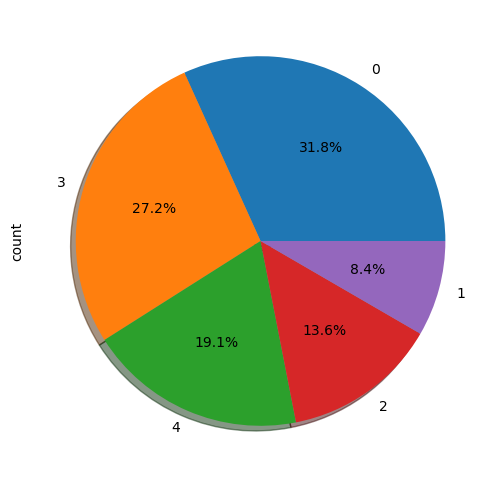

In [29]:
# Visualize the distribution of side effects
plt.figure(figsize=(6,6))
data_new['SideEffects'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True)
plt.show()

<Axes: xlabel='Age', ylabel='count'>

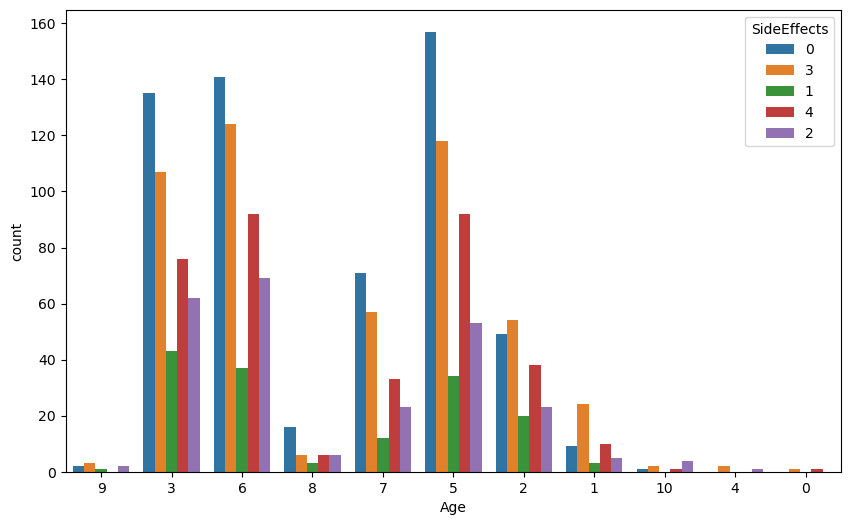

In [30]:
# Convert 'SideEffects' and 'Age' columns back to string for plotting
data_new['SideEffects'] = data_new['SideEffects'].astype(str)
data_new['Age'] = data_new['Age'].astype(str)

# Plot the distribution of side effects by age
plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='SideEffects',data=data_new)

<Axes: xlabel='Race', ylabel='count'>

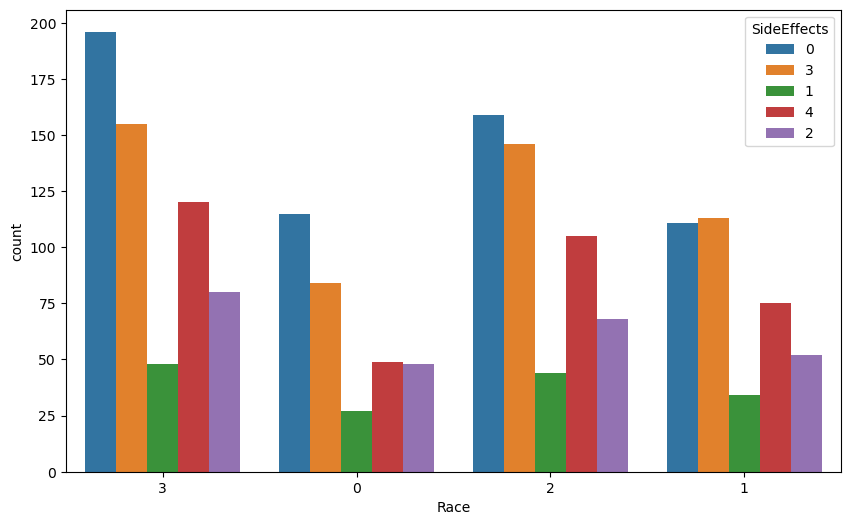

In [31]:
# Convert 'Race' column to string for plotting
data_new['Race'] = data_new['Race'].astype(str)

# Plot the distribution of side effects by race
plt.figure(figsize=(10, 6))
sns.countplot(x='Race',hue='SideEffects',data=data_new)

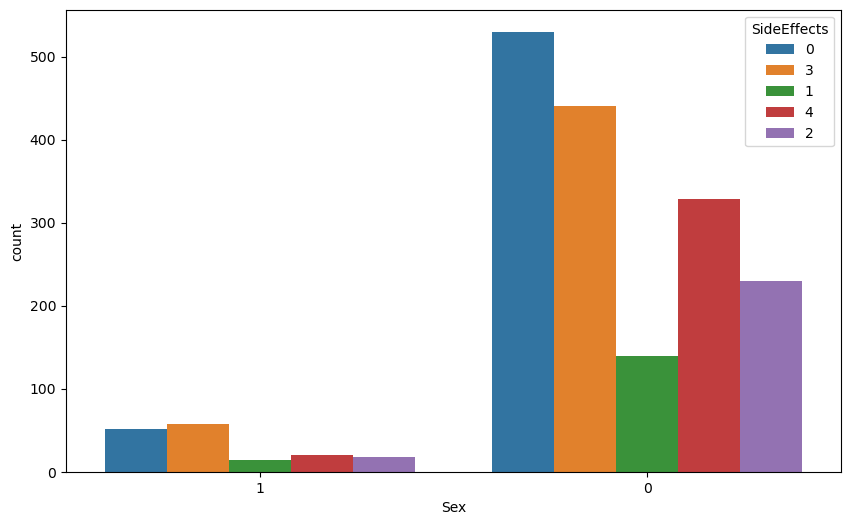

In [32]:
# Convert 'Sex' column to string for plotting
data_new['Sex'] = data_new['Sex'].astype(str)

# Plot the distribution of side effects by sex
plt.figure(figsize=(10, 6))
sns.countplot(x='Sex', hue='SideEffects', data=data_new)
plt.show()

In [33]:
# Prepare data for model training
y = data_new['SideEffects']
X = data_new.drop(['SideEffects'],axis=1)

In [34]:
from sklearn.model_selection import train_test_split

# Split data into training and testing sets
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state=42,test_size=0.2)

# 1. logistic regression model

In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score,recall_score,f1_score,classification_report

# Train a logistic regression model
logit_model = LogisticRegression(multi_class='multinomial', max_iter=2000)
logit_model.fit(X_train, y_train)

# Predict the test set
y_pred = logit_model.predict(X_test)

In [37]:
# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       120
           1       1.00      0.93      0.97        30
           2       0.96      1.00      0.98        49
           3       1.00      1.00      1.00        99
           4       0.99      1.00      0.99        68

    accuracy                           0.99       366
   macro avg       0.99      0.98      0.99       366
weighted avg       0.99      0.99      0.99       366



# 2. KNN Model

In [38]:
from sklearn.neighbors import KNeighborsClassifier

In [39]:
acc_values = []
neighbors = np.arange(3,15)

# creating a loop to create KNN model for each K value

for k in neighbors:
    
#taking the instance of KNN to a variable.the variable name is classifier.
    classifier = KNeighborsClassifier(n_neighbors= k, metric = 'minkowski')    
    classifier = KNeighborsClassifier(n_neighbors= k)
    classifier.fit(X_train,y_train)
    
    y_pred = classifier.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    acc_values.append(acc)

Text(0, 0.5, 'accuracy')

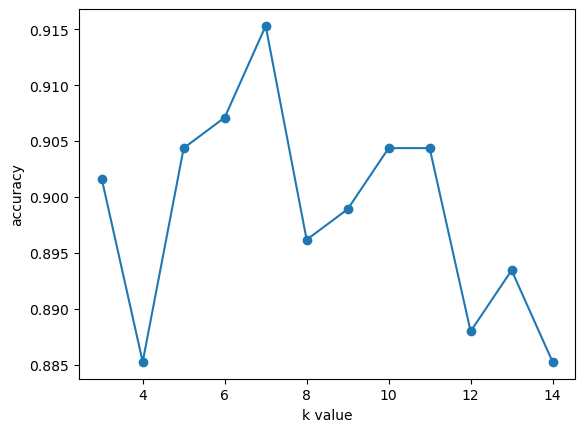

In [40]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')

In [41]:
classifier = KNeighborsClassifier(n_neighbors= 7, metric = 'minkowski')
classifier.fit(X_train,y_train)
y_pred = classifier.predict(X_test)

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.99      0.95       120
           1       0.89      0.53      0.67        30
           2       0.81      0.90      0.85        49
           3       0.94      0.99      0.97        99
           4       0.97      0.85      0.91        68

    accuracy                           0.92       366
   macro avg       0.91      0.85      0.87       366
weighted avg       0.92      0.92      0.91       366



# 3. Random Forest

In [43]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

# training the model
rf.fit(X_train,y_train)

# Predict the test set
y_pred=rf.predict(X_test)

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       120
           1       1.00      0.93      0.97        30
           2       0.96      1.00      0.98        49
           3       1.00      1.00      1.00        99
           4       1.00      1.00      1.00        68

    accuracy                           0.99       366
   macro avg       0.99      0.99      0.99       366
weighted avg       0.99      0.99      0.99       366



# Inference
## Accuracies of classification models:

1. Logistic Regression - 99%

2. KNN Model - 92%

3. Random Forest - 99%

# Conclusion
1. Performed various pre-processing steps and obtained a clean dataset for exploratory data analysis and modelling. Various visualisations were done on the dataset and selected a particular drug Topamax. Maximum users consume this drug for migraine prevention.

2. The best classification model was obtained by Linear Support Vector Machine. On performance evaluation, maximum accuracy of 58.06% has been achieved.

3. By race, Whites topped in the usage of this drug with a higher female ratio. Domination of female users were consistent across age groups above 12 and below 75 years. Also, people in the age groups 35 to 44, 45 to 54 and 25 to 34 accounted for maximum usage of Topamax. Most users found Topamax as highly effective, especially females. Most rated it highly for its ease of use as well. Side effects of the drug proved race neutral. Genderwise, side effects proved extreme in females.